In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [5]:
cars = pd.read_csv('car data.csv')

In [6]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
cars[['Fuel_Type','Seller_Type','Transmission']].value_counts()

Fuel_Type  Seller_Type  Transmission
Petrol     Dealer       Manual          116
           Individual   Manual           95
Diesel     Dealer       Manual           48
Petrol     Dealer       Automatic        18
Diesel     Dealer       Automatic        11
Petrol     Individual   Automatic        10
CNG        Dealer       Manual            2
Diesel     Individual   Automatic         1
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()

In [11]:
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [31]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int32  
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 20.1+ KB


In [48]:
s = cars.select_dtypes(include='object')

In [52]:
for i in s.iloc[:,1:].columns:
    cars[i] = Label.fit_transform(cars[i])

In [53]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [56]:
corrs =cars.iloc[:,1:].corr()

<Axes: >

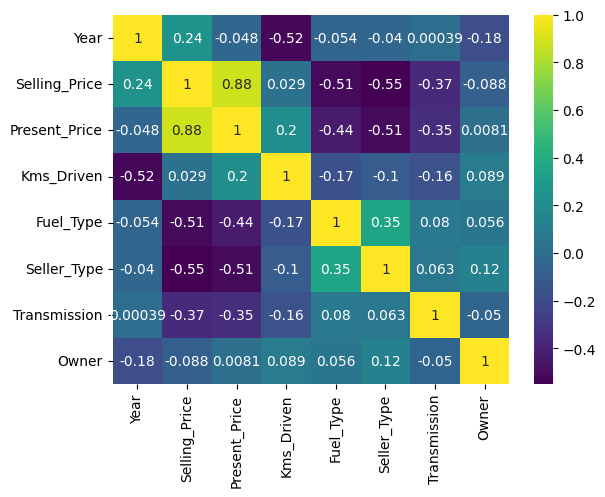

In [58]:
sns.heatmap(corrs,annot=True,cmap='viridis')

In [59]:
X = cars.drop(['Car_Name','Selling_Price'],axis=1)
Y  = cars['Selling_Price']

In [60]:
linear = LinearRegression()

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,shuffle=True,test_size=0.2,random_state=122)

In [62]:
linear.fit(x_train,y_train)

LinearRegression()

In [77]:
pred = linear.predict(x_test)

In [78]:
pred

array([-3.4708047 ,  7.59543745,  4.91026992, -1.1699711 ,  3.3703261 ,
       -0.6392066 ,  1.46277298,  7.56826829,  1.77137701, -0.16948929,
       -1.23793859,  4.66223619,  5.13970312,  7.76924182,  7.06117824,
        4.46377687,  7.01821833, 21.23000158, -1.29456391,  9.00747605,
        2.86755977,  3.86356194, -1.14466206,  6.29448947,  7.72294877,
        4.1761114 ,  2.05514124,  1.93129178, -0.35562435,  8.2082349 ,
        6.22457416,  0.36247679,  0.56288825, 10.03637338,  4.94525785,
        0.62147758,  0.45209769,  1.73568845,  0.32780252,  4.2838424 ,
        9.90005917,  6.42837286,  5.24511161,  1.70299096,  3.65479374,
        7.09457476,  5.9810624 ,  4.46169794,  8.2509777 ,  1.44781279,
        8.16878475, 10.61126138,  4.38416289, -2.76026471,  4.35542198,
        9.33091808,  8.77945427,  1.55286988,  4.97431564,  1.257978  ,
        0.9056563 ])

In [75]:
linear

LinearRegression()

In [70]:
y_train.shape,pred.shape

((240,), (61,))

In [79]:
metrics.r2_score(y_test,pred)

0.797200612650173

<Axes: xlabel='Selling_Price'>

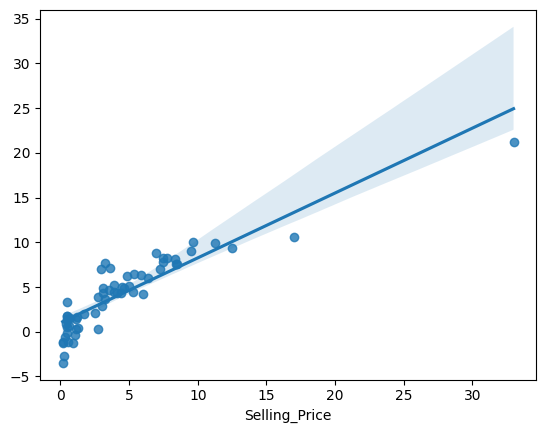

In [84]:
sns.regplot(x=y_test,y=pred)

In [85]:
ads = pd.read_csv('advertising.csv')

In [86]:
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [87]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


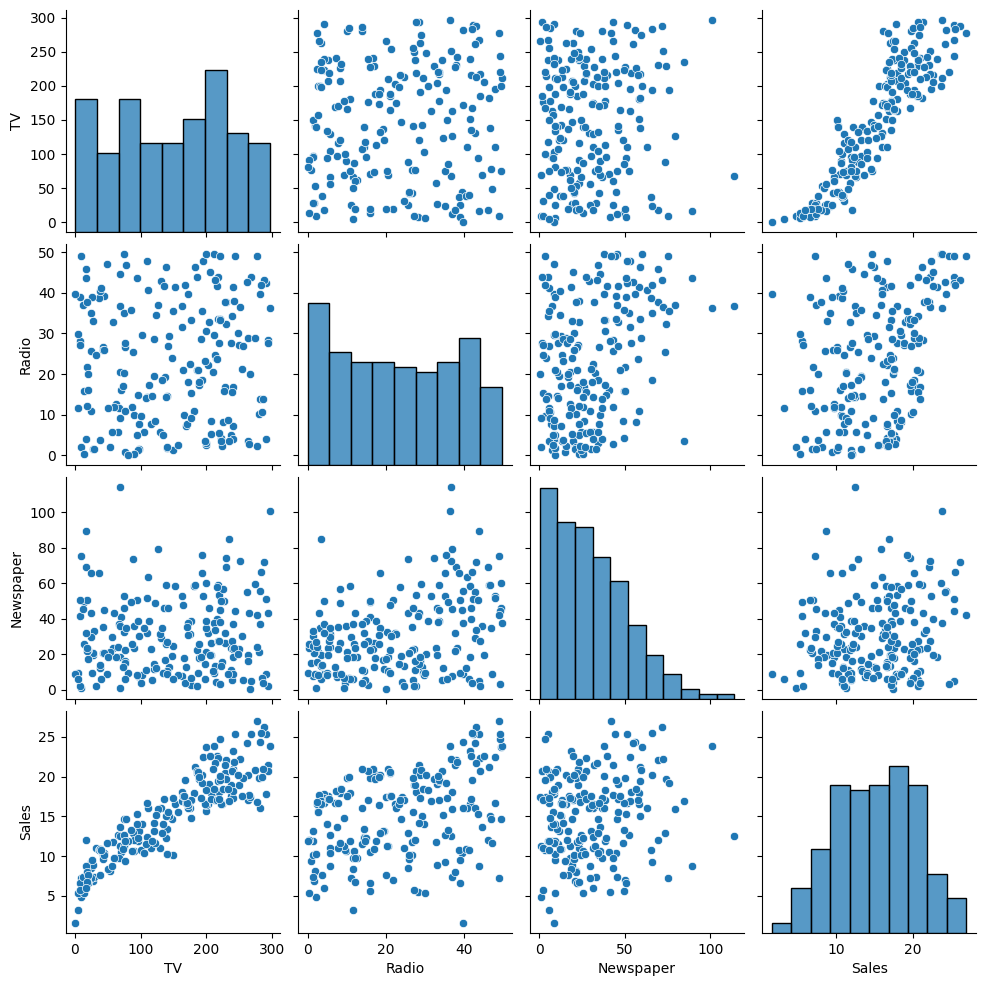

In [89]:
sns.pairplot(ads)

In [90]:
x=ads.drop(['Sales'],axis=1)
y = ads['Sales']

In [91]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=121,test_size=0.2,shuffle=True)

In [92]:
linear_ads = LinearRegression()

In [93]:
linear_ads.fit(xtrain,ytrain)

LinearRegression()

In [95]:
adspred= linear_ads.predict(xtest)

In [97]:
metrics.r2_score(ytest,adspred)

0.9003293732687101

<Axes: xlabel='Sales'>

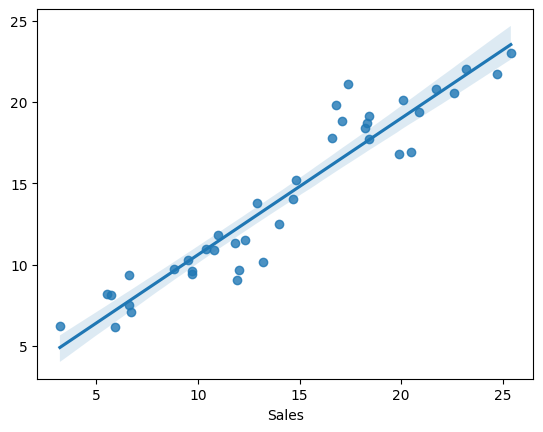

In [98]:
sns.regplot(x=ytest,y=adspred)

<Axes: >

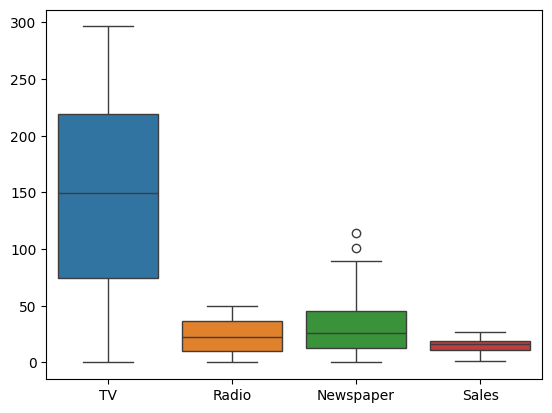

In [99]:
sns.boxplot(ads)